# Trip Segments Extraction from GTFS Data

In [2]:
import pandas as pd
import geopandas as gpd
import gtfs_functions as gtfs
import matplotlib.pyplot as plt
import seaborn as sn

OSError: could not find or load spatialindex_c-32.dll

Once the GTFS dataset is downloaded, it can be read as follows:

In [3]:
routes, stops, stop_times, trips, shapes = gtfs.import_gtfs("GTFS.zip")

Let's read all the imported files:

## routes

In [4]:
routes.head(5)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,1,1,ALTON PARK,NaN,3,NaN,FCB814,000000
1,10A,1,10A,AVON,NaN,3,NaN,9AD2AE,000000
2,10C,1,10C,CAMPBELL,NaN,3,NaN,9AD2AE,000000
3,10G,1,10G,GLENWOOD,NaN,3,NaN,9AD2AE,000000
4,13,1,13,ROSSVILLE,NaN,3,NaN,00A54F,000000


## stops

In [5]:
stops.head(5)

,stop_id,stop_code,stop_name,stop_desc,zone_id,stop_url,geometry
0,12,12,MARKET + FAMILY DOLLAR,NaN,NaN,NaN,POINT (-85.30953 35.05070)
1,17,17,MARKET + 11TH,NaN,NaN,NaN,POINT (-85.30944 35.04425)
2,18,18,MARKET + 12TH,NaN,NaN,NaN,POINT (-85.30907 35.04235)
3,19,19,MARKET + COWART,NaN,NaN,NaN,POINT (-85.30839 35.04095)
4,21,21,MARKET + MAIN,NaN,NaN,NaN,POINT (-85.30732 35.03638)


## Stop times

In [6]:
stop_times.head(5)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,route_id,service_id,direction_id,shape_id,stop_code,stop_name,stop_desc,zone_id,stop_url,geometry
0,132994020,17700.0,17700.0,1351,1,NaN,0,0,NaN,1,1,305,0,1:03,1351,MARKET + 4TH,NaN,NaN,NaN,POINT (-85.30972 35.05266)
1,132994020,17741.0,17741.0,12,2,NaN,0,0,NaN,0,1,305,0,1:03,12,MARKET + FAMILY DOLLAR,NaN,NaN,NaN,POINT (-85.30953 35.05070)
2,132994020,17780.0,17780.0,1555,3,NaN,0,0,NaN,0,1,305,0,1:03,1555,MARKET + 6TH,NaN,NaN,NaN,POINT (-85.30955 35.04883)
3,132994020,17795.0,17795.0,1579,4,NaN,0,0,NaN,0,1,305,0,1:03,1579,MARKET + FIRST TENNESSEE BANK(7TH),NaN,NaN,NaN,POINT (-85.30955 35.04812)
4,132994020,17842.0,17842.0,1354,5,NaN,0,0,NaN,0,1,305,0,1:03,1354,MARKET + M.L.KING BLVD,NaN,NaN,NaN,POINT (-85.30952 35.04598)


## Trips

In [7]:
trips.head(5)

,trip_id,route_id,service_id,direction_id,shape_id
0,133052020,1,305,1,1:65
1,133175020,10A,305,0,10A:01
2,133184020,10A,305,0,10A:01
3,133195020,10A,305,0,10A:01
4,133302020,10G,305,1,10G:54


## Shapes

In [8]:
shapes.head(5)

,shape_id,geometry
0,10A:01,"LINESTRING (-85.30864 35.04167, -85.30864 35.0..."
1,10A:04,"LINESTRING (-85.26871 35.05617, -85.26863 35.0..."
2,10A:51,"LINESTRING (-85.26770 35.05770, -85.26760 35.0..."
3,10A:52,"LINESTRING (-85.25008 35.07193, -85.25031 35.0..."
4,10A:55,"LINESTRING (-85.25008 35.07193, -85.25031 35.0..."


# Stop Frequencies

The following function (`gtfs.stop_freq()`) will create a geodataframe with the **frequency** for each combination of `stop`, **time of day** and `direction`. 

- Each row with a Point geometry.
- The `stops_freq` function takes `stop_times` and `stops` created in the previous steps as arguments.
    * The user can optionally specify `cutoffs` as a list in case the default is not good:
        + These `cutoffs` are the times of days to use as aggregation.

In [9]:
cutoffs = [0,6,9,10, 11, 12, 13 , 14, 15, 19,22,24]
stop_freq = gtfs.stops_freq(stop_times, stops, cutoffs = cutoffs)
stop_freq.head(5)

,stop_id,dir_id,window,ntrips,frequency,max_trips,max_freq,stop_name,geometry
3509,1504,Outbound,0:00-6:00,1,360,5,12,MAIN + BEECH,POINT (-85.27884 35.02572)
530,1082,Outbound,0:00-6:00,1,360,4,15,GERMANTOWN + MONTVIEW,POINT (-85.24500 35.02683)
8145,522,Inbound,0:00-6:00,1,360,5,12,HIXSON PK + RIVERVIEW,POINT (-85.28817 35.07514)
8135,520,Inbound,0:00-6:00,1,360,5,12,HIXSON PK + 1336,POINT (-85.28858 35.07296)
519,1080,Outbound,0:00-6:00,1,360,4,15,GERMANTOWN + ROGERS ROAD,POINT (-85.24301 35.03049)


# Line Frequencies

This function will create a geodataframe with the **frequency** for each combination of `line`, **time of day** and `direction`.
- Each row with a `LineString` **geometry**.
- The `line_freq` function takes `stop_times`, `trips`, `shapes`, `routes` created in the previous steps as arguments.
    * The user can optionally specify `cutoffs` as a list in case the default is not good:
        + These `cutoffs` are the **times of days** to use as aggregation.


In [10]:
# cutoffs = [0,6,9,10, 11, 12, 13 , 14, 15, 19,22,24]
line_freq = gtfs.lines_freq(stop_times, trips, shapes, routes, cutoffs = cutoffs)
line_freq.head(5)

,route_id,route_name,dir_id,window,frequency,ntrips,max_freq,max_trips,geometry
204,13,13 ROSSVILLE,Inbound,0:00-6:00,360,1,30,2,"LINESTRING (-85.26871 35.05617, -85.26863 35.0..."
337,15,15 ST. ELMO,Outbound,0:00-6:00,360,1,30,2,"LINESTRING (-85.33213 34.98680, -85.33202 34.9..."
161,10G,10G GLENWOOD,Outbound,0:00-6:00,360,1,15,4,"LINESTRING (-85.25016 35.07173, -85.24989 35.0..."
160,10G,10G GLENWOOD,Outbound,0:00-6:00,360,1,15,4,"LINESTRING (-85.25016 35.07173, -85.24989 35.0..."
159,10G,10G GLENWOOD,Outbound,0:00-6:00,360,1,15,4,"LINESTRING (-85.25016 35.07173, -85.24989 35.0..."


# Bus Segments

The function `cut_gtfs` takes `stop_times`, `stops`, and `shapes` created by `import_gtfs` as arguments and returns a `geodataframe` where **each segment is a row** and has a `LineString` **geometry**.


In [11]:
segments_gdf = gtfs.cut_gtfs(stop_times, stops, shapes)
segments_gdf.head(5)

,route_id,direction_id,stop_sequence,start_stop_name,end_stop_name,start_stop_id,end_stop_id,segment_id,shape_id,geometry,distance_m
0,14,1,1,MCCALLIE + HOUSTON,HOUSTON + OAK,413,414,413-414,14:51,"LINESTRING (-85.30402 35.04688, -85.30408 35.0...",97.646014
1,14,1,2,HOUSTON + OAK,VINE + HOUSTON,414,1570,414-1570,14:51,"LINESTRING (-85.30370 35.04768, -85.30371 35.0...",163.594548
2,14,1,3,VINE + HOUSTON,VINE + UTC ATHLETIC TRAINING FACILITY,1570,1448,1570-1448,14:51,"LINESTRING (-85.30298 35.04894, -85.30276 35.0...",101.378703
3,14,1,4,VINE + UTC ATHLETIC TRAINING FACILITY,VINE + DOUGLAS,1448,416,1448-416,14:51,"LINESTRING (-85.30197 35.04856, -85.30196 35.0...",133.710772
4,14,1,5,VINE + DOUGLAS,DOUGLAS + 5TH,416,417,416-417,14:51,"LINESTRING (-85.30065 35.04805, -85.30044 35.0...",154.491443


# Schedule Speeds

This function will create a `geodataframe` with the `speed_kmh` and `speed_mph` for **each combination** of `line`, `segment`, **time of day** and `direction`.
- Each row with a `LineString` **geometry**.
- The function `speeds_from_gtfs` takes `routes`, `stop_times` and `segments_gdf` created in the previous steps as arguments. 
    * The user can optionally specify `cutoffs` as a list in case the default is not good:
        + These `cutoffs` are the **times of days** to use as aggregation.

In [12]:
# Cutoffs to make get hourly values
cutoffs = list(range(24))
speeds = gtfs.speeds_from_gtfs(routes, stop_times, segments_gdf, cutoffs = cutoffs)
speeds.head(5)

,route_id,route_name,dir_id,segment_id,window,speed_kmh,s_st_id,s_st_name,e_st_id,e_st_name,distance_m,stop_seq,runtime_h,max_kmh,geometry,speed_mph,max_mph
0,1,1 ALTON PARK,Inbound,1351-12,10:00-11:00,18.4,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.679204,1,0.012611,100.00,"LINESTRING (-85.30972 35.05266, -85.30975 35.0...",11.433226,62.137100
1,1,1 ALTON PARK,Inbound,354-505,10:00-11:00,29.0,354,SHOLAR + CARTA,505,RIVERSIDE + RIVER PARK,1374.579138,1,0.047500,62.00,"LINESTRING (-85.26871 35.05617, -85.26863 35.0...",18.019759,38.525002
2,1,1 ALTON PARK,Inbound,12-1555,10:00-11:00,17.8,12,MARKET + FAMILY DOLLAR,1555,MARKET + 6TH,203.848174,2,0.011759,105.00,"LINESTRING (-85.30969 35.05066, -85.30964 35.0...",11.060404,65.243955
3,1,1 ALTON PARK,Inbound,505-784,10:00-11:00,29.0,505,RIVERSIDE + RIVER PARK,784,MABEL + BATTERY PLACE,1864.867887,2,0.064722,61.55,"LINESTRING (-85.28102 35.05597, -85.28093 35.0...",18.019759,38.245385
4,1,1 ALTON PARK,Inbound,1555-1579,10:00-11:00,17.8,1555,MARKET + 6TH,1579,MARKET + FIRST TENNESSEE BANK(7TH),78.810204,3,0.004537,95.00,"LINESTRING (-85.30955 35.04883, -85.30955 35.0...",11.060404,59.030245


We can have information about all the `speeds` per `segment_id` and **time frame**.

- For example, let's extract the calculated speeds of the `segment_id == 1351-12` from `10:00` to `11:00`:

In [13]:
# 1351-12
speeds.loc[(speeds.segment_id=='1351-12')&(speeds.window=='10:00-11:00')]

,route_id,route_name,dir_id,segment_id,window,speed_kmh,s_st_id,s_st_name,e_st_id,e_st_name,distance_m,stop_seq,runtime_h,max_kmh,geometry,speed_mph,max_mph
0,1,1 ALTON PARK,Inbound,1351-12,10:00-11:00,18.4,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.679204,1,0.012611,100.0,"LINESTRING (-85.30972 35.05266, -85.30975 35.0...",11.433226,62.137100
18,1,1 ALTON PARK,Inbound,1351-12,10:00-11:00,18.4,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.167861,10,0.012611,100.0,"LINESTRING (-85.30970 35.05265, -85.30975 35.0...",11.433226,62.137100
5176,10A,10A AVON,Outbound,1351-12,10:00-11:00,32.0,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.199110,39,0.006944,35.0,"LINESTRING (-85.30977 35.05266, -85.30969 35.0...",19.883872,21.747985
5204,10A,10A AVON,Outbound,1351-12,10:00-11:00,32.0,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,220.970469,46,0.006944,35.0,"LINESTRING (-85.30970 35.05265, -85.30969 35.0...",19.883872,21.747985
31825,19,19 CROMWELL ROAD,Outbound,1351-12,10:00-11:00,21.0,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.199110,79,0.010833,35.0,"LINESTRING (-85.30977 35.05266, -85.30969 35.0...",13.048791,21.747985
31826,19,19 CROMWELL ROAD,Outbound,1351-12,10:00-11:00,21.0,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.525124,79,0.010833,35.0,"LINESTRING (-85.30977 35.05266, -85.30977 35.0...",13.048791,21.747985
33824,21,21 GOLDEN GATEWAY,Inbound,1351-12,10:00-11:00,31.0,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.167861,10,0.007222,100.0,"LINESTRING (-85.30970 35.05265, -85.30975 35.0...",19.262501,62.137100
36606,28,28 AMNICOLA HWY CHATT STATE,Outbound,1351-12,10:00-11:00,14.0,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,221.944394,14,0.015833,35.0,"LINESTRING (-85.30970 35.05265, -85.30975 35.0...",8.699194,21.747985
36607,28,28 AMNICOLA HWY CHATT STATE,Outbound,1351-12,10:00-11:00,14.0,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.167861,14,0.015833,35.0,"LINESTRING (-85.30970 35.05265, -85.30975 35.0...",8.699194,21.747985
38524,4,4 EASTGATE/HAMILTON PL,Inbound,1351-12,10:00-11:00,19.4,1351,MARKET + 4TH,12,MARKET + FAMILY DOLLAR,222.679204,1,0.012063,100.0,"LINESTRING (-85.30972 35.05266, -85.30975 35.0...",12.054597,62.137100


Let's make a histogram of the calculated speeds for this segment_id and time window:

<AxesSubplot:ylabel='Frequency'>

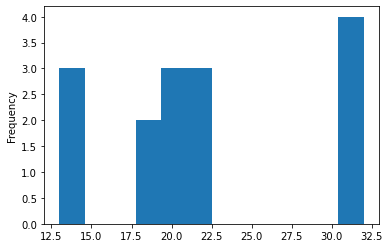

In [14]:
speeds.loc[(speeds.segment_id=='1351-12')&(speeds.window=='10:00-11:00')]['speed_kmh'].plot.hist(bins = 12)


# Segment Frequencies

In [15]:
#cutoffs = [0,6,9,15.5,19,22,24]
seg_freq = gtfs.segments_freq(segments_gdf, stop_times, routes, cutoffs = cutoffs)
seg_freq.head(10)

,route_id,route_name,dir_id,segment_id,window,frequency,ntrips,s_st_id,s_st_name,e_st_name,max_freq,max_trips,geometry
13766,19,19 CROMWELL ROAD,Inbound,630-631,7:00-8:00,60,1,630,WILCOX + DALEWOOD,WILCOX + TALLEY,60,1,"LINESTRING (-85.22860 35.04374, -85.22859 35.0..."
41204,ALL_LINES,All lines,NA,1180-1181,21:00-22:00,60,1,1180,MAIN + HOLLY,MAIN + HIGHLAND PK,12,5,"LINESTRING (-85.28408 35.02748, -85.28408 35.0..."
41233,ALL_LINES,All lines,NA,1185-1186,21:00-22:00,60,1,1185,MAIN + POLK,MAIN + FAGAN,12,5,"LINESTRING (-85.29264 35.03060, -85.29264 35.0..."
32772,ALL_LINES,All lines,NA,1409-430,7:00-8:00,60,1,1409,BROAD + 19TH,BROAD + 20TH,30,2,"LINESTRING (-85.31311 35.03439, -85.31311 35.0..."
41231,ALL_LINES,All lines,NA,369-370,21:00-22:00,60,1,369,CHAMBERLAIN + CAMDEN,CHAMBERLAIN + WILCOX,10,6,"LINESTRING (-85.25582 35.05304, -85.25577 35.0..."
32777,ALL_LINES,All lines,NA,172-174,7:00-8:00,60,1,172,4TH + HOUSTON,3RD + SISKIN,60,1,"LINESTRING (-85.30189 35.05130, -85.30188 35.0..."
41229,ALL_LINES,All lines,NA,1184-1185,21:00-22:00,60,1,1184,MAIN + FILLMORE,MAIN + POLK,12,5,"LINESTRING (-85.29146 35.03018, -85.29146 35.0..."
9461,14,14 MOCS EXPRESS,Inbound,402-403,20:00-21:00,60,1,402,PALMETTO + CHALLENGER CENTER,PALMETTO + 5TH,6,10,"LINESTRING (-85.29376 35.04765, -85.29383 35.0..."
32780,ALL_LINES,All lines,NA,1026-414,7:00-8:00,60,1,1026,HOUSTON + MCALLIE,HOUSTON + OAK,30,2,"LINESTRING (-85.30427 35.04664, -85.30421 35.0..."
41226,ALL_LINES,All lines,NA,368-369,21:00-22:00,60,1,368,CHAMBERLAIN + OCOEE,CHAMBERLAIN + CAMDEN,10,6,"LINESTRING (-85.25519 35.05421, -85.25519 35.0..."


Similarly, we can extract specific data using conditions:

In [16]:
seg_freq.loc[(seg_freq.segment_id=='630-631')&(seg_freq.window=='7:00-8:00')].head(10)

,route_id,route_name,dir_id,segment_id,window,frequency,ntrips,s_st_id,s_st_name,e_st_name,max_freq,max_trips,geometry
13766,19,19 CROMWELL ROAD,Inbound,630-631,7:00-8:00,60,1,630,WILCOX + DALEWOOD,WILCOX + TALLEY,60,1,"LINESTRING (-85.22860 35.04374, -85.22859 35.0..."
22633,8,8 EASTDALE,Inbound,630-631,7:00-8:00,60,1,630,WILCOX + DALEWOOD,WILCOX + TALLEY,60,1,"LINESTRING (-85.22860 35.04374, -85.22859 35.0..."
22645,8,8 EASTDALE,Outbound,630-631,7:00-8:00,60,1,630,WILCOX + DALEWOOD,WILCOX + TALLEY,15,4,"LINESTRING (-85.22860 35.04374, -85.22859 35.0..."
33081,ALL_LINES,All lines,NA,630-631,7:00-8:00,20,3,630,WILCOX + DALEWOOD,WILCOX + TALLEY,12,5,"LINESTRING (-85.22860 35.04374, -85.22859 35.0..."


# Save Files

## Stop Frequencies

In [28]:
file_name = 'stop_frequencies'
gtfs.save_gdf(stop_freq, file_name, shapefile=True, geojson=True)

## Line Frequencies

In [29]:
file_name = 'line_frequencies'
gtfs.save_gdf(line_freq, file_name, shapefile=True, geojson=True)

## Bus Segments

In [30]:
file_name = 'bus_segments'
gtfs.save_gdf(segments_gdf, file_name, shapefile=True, geojson=True)

## Schedule Speeds

In [31]:
file_name = 'speeds'
gtfs.save_gdf(speeds, file_name, shapefile=True, geojson=True)

# Segment Frequencies

In [32]:
file_name = 'segment_frequencies'
gtfs.save_gdf(seg_freq, file_name, shapefile=True, geojson=True)

# Maps

## Stop Frequencies

In [17]:
condition_dir = stop_freq.dir_id == 'Inbound'
condition_window = stop_freq.window == '10:00-11:00'

gdf = stop_freq.loc[(condition_dir & condition_window),:].reset_index()

gtfs.map_gdf(gdf = gdf, 
              variable = 'ntrips', 
              colors = ["#d13870", "#e895b3" ,'#55d992', '#3ab071', '#0e8955','#066a40'], 
              tooltip_var = ['frequency'] , 
              tooltip_labels = ['Frequency: '], 
              breaks = [1, 2, 3, 5, 10, 15])

## Line Frequencies

In [35]:
# Line frequencies
condition_dir = line_freq.dir_id == 'Inbound'
condition_window = line_freq.window == '10:00-11:00'

gdf = line_freq.loc[(condition_dir & condition_window),:].reset_index()

gtfs.map_gdf(gdf = gdf, 
              variable = 'ntrips', 
              colors = ["#d13870", "#e895b3" ,'#55d992', '#3ab071', '#0e8955','#066a40'], 
              tooltip_var = ['route_name'] , 
              tooltip_labels = ['Route: '], 
              breaks = [5, 10, 20, 50])

## Speeds

In [38]:
from gtfs_functions.gtfs_funtions import lines_freq
from keplergl import KeplerGl

map_1 = KeplerGl(height = 550)
map_1.add_data(data = stop_freq)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


AttributeError: 'str' object has no attribute '_geom'

In [76]:
map_1.save_to_html(file_name = 'Chattanooga_Bus_Speeds.html')

Map saved to Chattanooga_Bus_Speeds.html!


# Descriptive Data


## Histograms

In [73]:
#import plotly.express as px

#px.histogram(
#    stop_freq.loc[stop_freq.frequency < 50],
#    x = 'frequency',
#    title = 'Stop Frequencies',
#    template = 'simple_white',
#    nbins = 10
#)

from plotly.graph_objects import Bar, Layout
from plotly import offline

Hist_data = [Bar(x = stop_freq['ntrips'].unique(), y = stop_freq.groupby('stop_id')['frequency'].count().sort_values())]
x_axis_config = {'title': 'Number of trips'}
y_axis_config = {'title': 'Counts'}
my_layout = Layout(title = 'Stop Frequencies', xaxis = x_axis_config, yaxis = y_axis_config)

offline.plot({'data': Hist_data, 'layout': my_layout}, filename = 'hist_stop_freq.html')


'hist_stop_freq.html'

In [72]:


#stop_freq.loc[1]

stop_id
902      1
1472     1
1885     1
1865     1
1884     1
        ..
1560    22
1555    22
166     22
806     22
1351    22
Name: frequency, Length: 1180, dtype: int64

## Heatmaps

This code creates a Heatmap with the scheduled speeds per segment for one specific route and direction.

In [74]:
# Heatmap
import numpy as np
import plotly.graph_objects as pltly
from plotly import offline

dir_0 = speeds.loc[(speeds.dir_id=='Inbound')&(speeds.route_name=='8 EASTDALE')].sort_values(by='stop_seq') 
dir_0['hour'] = dir_0.window.apply(lambda x: int(x.split(':')[0]))
dir_0.sort_values(by='hour', ascending=True, inplace=True)

fig = pltly.Figure(data=go.Heatmap(
                   z=dir_0.speed_kmh,
                   y=dir_0.s_st_name,
                   x=dir_0.window,
                   hoverongaps = False,
                   colorscale=px.colors.colorbrewer.RdYlBu, 
                   reversescale=False
))

fig.update_yaxes(title_text='Stop', autorange='reversed')
fig.update_xaxes(title_text='Hour of day', side='top')
fig.update_layout(showlegend=False, height=600, width=1000,
                 title='Speed heatmap per direction and hour of the day')

fig.show()

## Line charts: Speed on a segment by hour of the day

In [75]:
import plotly.graph_objects as go
example2 = speeds.loc[(speeds.s_st_name=='Fillmore St & Bay St')&(speeds.route_name=='All lines')].sort_values(by='stop_seq') 
example2['hour'] = example2.window.apply(lambda x: int(x.split(':')[0]))
example2.sort_values(by='hour', ascending=True, inplace=True)

fig = go.Figure()

trace = go.Scatter(
    name='Speed',
    x=example2.hour, 
    y=example2.speed_kmh,
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='#F0F0F0',
    fill='tonexty',
    opacity = 0.5)

data = [trace]

layout = go.Layout(
    yaxis=dict(title='Average Speed (km/h)'),
    xaxis=dict(title='Hour of day'),
    title='Average Speed by hour of day in stop Fillmore St & Bay St',
    showlegend = False, template = 'simple_white')

fig = go.Figure(data=data, layout=layout)

# Get the labels in the X axis right
axes_labels = [] 
tickvals=example2.hour.unique()[::3][1:]

for i in range(0, len(tickvals)):
    label = str(tickvals[i]) + ':00'
    axes_labels.append(label)

fig.update_xaxes(
    ticktext=axes_labels,
    tickvals=tickvals
)

# Add vertical lines
y_max_value = example2.speed_kmh.max()

for i in range(0, len(tickvals)):
    fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=tickvals[i],
            y0=0,
            x1=tickvals[i],
            y1=y_max_value,
            line=dict(
                color="Grey",
                width=1
            )
        )
    )
    
# Labels in the edge values
for i in range(0, len(tickvals)):    
    y_value = example2.loc[example2.hour==tickvals[i], 'speed_kmh'].values[0].round(2)
    fig.add_annotation(
        x=tickvals[i],
        y=y_value,
        text=str(y_value),
    )
fig.update_annotations(dict(
            xref="x",
            yref="y",
            showarrow=True,
            arrowhead=0,
            ax=0,
            ay=-18
))

fig.update_yaxes(rangemode='tozero')

fig.show()

# Chattanooga 2019

In [22]:
#carta = pd.read_csv('cartaapc_dashboard.csv', error_bad_lines = False)

In [29]:
import mzgtfs
#import mzgtfs.validation

In [26]:
gtfs_feed = mzgtfs.feed(filename='GTFS.zip')

AttributeError: module 'mzgtfs' has no attribute 'feed'